# 선형회귀 알고리즘
변수가 1개인 선형회귀부터 n원 연립일차방정식 풀이 알고리즘을 통해 다중 선형 회귀까지

by piz2a [Github](https://github.com/piz2a)

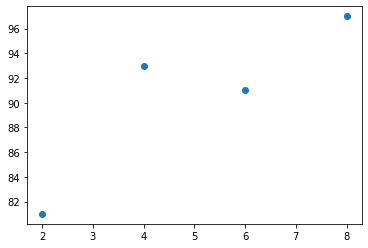

In [49]:
#선형회귀 데이터 준비

import numpy as np
import matplotlib.pyplot as plt


n = 4
data1 = np.array([[2, 4, 6, 8], [81, 93, 91, 97]])
x, y = data1

plt.scatter(x, y)
plt.show()

<img src="./linear.jpg" width=640 height=839></img>

a=2.3, b=79.0


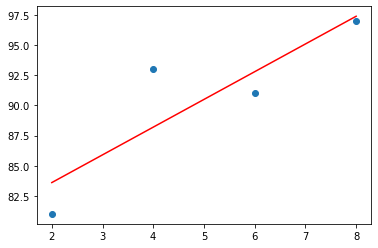

In [50]:
# 선형회귀

s_x = np.sum(x)
s_y = np.sum(y)
s_x2 = np.sum(x ** 2)
s_xy = np.sum(x * y)

a = (n * s_xy - s_x * s_y) / (n * s_x2 - (s_x) ** 2)
b = (s_x2 * s_y - s_x * s_xy) / (n * s_x2 - (s_x) ** 2)

y_pred = a * x + b

print(f'a={a}, b={b}')
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
plt.show()

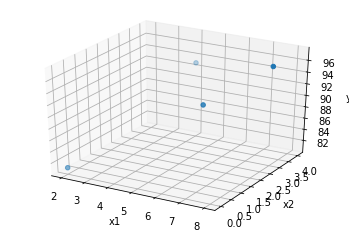

In [51]:
# 다중 선형회귀 데이터 준비
fig = plt.figure()
ax = fig.gca(projection='3d')

data2 = np.array([[2, 4, 6, 8], [0, 4, 2, 3], [81, 93, 91, 97]])
x1, x2, y = data2

ax.scatter(x1, x2, y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

In [ ]:
# n원 연립일차방정식 풀이

def solve_system_of_linear_equations(eqs):
    n = len(eqs)

    if not all(len(row) == n+1 for row in eqs):
        return ValueError("You can only input n x (n+1) float type arrays into eqs")

    # 식이 1개일 때, 미지수가 1개일 때
    if n == 1:
        an, b = eqs[0]
        if an != 0:
            return [-b/an]
        elif an == 0 and b == 0:
            return ['indeterminate']
        elif an == 0 and b != 0:
            return ['impossible']
        
    # 미지수(x1) 소거
    eqs_n_1 = []  # new equations in n-1 variables
    for i in range(n-1):
        a11, a12 = eqs[i][0], eqs[i+1][0]
        # g1 = gcd(a11, a12)
        eqs_n_1.append(
            [a12 * eqs[i][j] - a11 * eqs[i+1][j] for j in range(1, n+1)]
        )

    # 소거 후 (n-1)개의 방정식으로 재귀 호출
    x2_n = solve_system_of_linear_equations(eqs_n_1)
    if x2_n[0] in ['indeterminate', 'impossible']:
        return x2_n

    # a1 != 0인 eq[i]를 찾아 x2부터 xn까지 대입하여 x1을 구한다
    x1 = None
    for i in range(n):
        if eqs[i][0] != 0:
            x1 = -(sum(eqs[i][k] * x2_n[k-1] for k in range(1, n)) + eqs[i][n]) / eqs[i][0]
            break

    if x1 is None:
        return ['indeterminate']

    return [x1] + x2_n


eqs = []
eq_strs1 = input().split()
n = len(eq_strs1) - 1
eqs.append(list(map(float, eq_strs1)))
for _ in range(1, n):
    eqs.append(list(map(float, input().split())))
print(f'Solutions: {solve_system_of_linear_equations(eqs)}')

"""
방정식의 계수만 공백을 두고 입력하세요.
예시: x1 + 8x2 - 7 = 0, 2x1 + 5x2 + 3 = 0이면
1 8 -7
2 5 3
로 입력

방정식의 개수는 계수의 개수를 세어 알아서 판단하므로 방정식의 수를 따로 입력할 필요는 없습니다.
해는 리스트 형식으로 나오는데 왼쪽부터 x1, x2, ...입니다.
"""

<img src="./multiple_linear.jpg" width=640 height=670></img>

a1=1.499999999999998, a2=2.285714285714285, b=77.85714285714286
Average Error: 0.2142857142857153


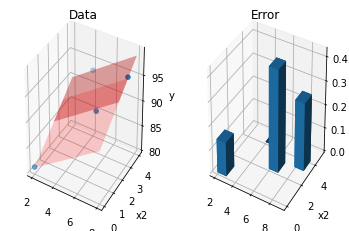

In [55]:
# 다중 선형회귀 연립방정식으로 풀기

def multiple_linear_regression(data):
    m = data.shape[0] - 1
    n = data.shape[1]
    eqs = []
    x = data[:-1]
    y = data[-1]
    for k in range(m):
        eqs.append(
            [sum(x[j][i] * x[k][i] for i in range(n)) for j in range(m)]
            + [sum(x[k][i] for i in range(n)), -sum(x[k][i] * y[i] for i in range(n))]
        )
    eqs.append(
        [sum(x[j][i] for i in range(n)) for j in range(m)]
        + [n, -sum(y[i] for i in range(n))]
    )

    return solve_system_of_linear_equations(eqs)


def show_3d_linear_regression(data, solution):  # m = 2
    a1, a2, b = solution
    print(f'a1={a1}, a2={a2}, b={b}')
    
    x1, x2, y = data
    fig = plt.figure()
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')

    ax1.scatter(x1, x2, y)
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('y')
    ax1.set_title('Data')
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_zlabel('y')
    ax2.set_title('Error')

    X1, X2 = np.meshgrid(x1, x2)
    y_pred = a1 * X1 + a2 * X2 + b
    ax1.plot_surface(X1, X2, y_pred, color='red', alpha=0.2)
    
    n = data.shape[1]
    y_err = np.abs((a1 * x1 + a2 * x2 + b) - y)
    y_coord = np.zeros(n)
    dx1 = dx2 = np.ones(n)
    # print(x1, x2, y_err)
    print(f'Average Error: {np.average(y_err)}')
    ax2.bar3d(x1, x2, y_coord, dx1, dx2, y_err)
    # ax2.view_init(30, 60)
    plt.show()


show_3d_linear_regression(data2, multiple_linear_regression(data2))

[  1.  125.8  27.3]
a1=-0.9513852333160212, a2=0.8963888091055623, b=-83.5446719697941
Average Error: 4.241613253052818


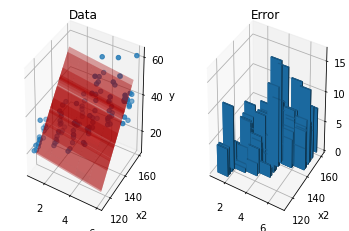

In [53]:
# 학년과 키에 따른 몸무게 데이터 분석

data3 = np.genfromtxt('Student Medical Exam Results.csv', delimiter=',')[1:].T[:-1]
print(data3.T[0])

sol = multiple_linear_regression(data3)
show_3d_linear_regression(data3, sol)